In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [12]:
#1. Load Dataset 
df = pd.read_csv("D:\churn analysis\churn.csv")


<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\mkl98\AppData\Local\Temp\ipykernel_13756\315150951.py:2: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("D:\churn analysis\churn.csv")


In [15]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())


Dataset Loaded Successfully!
Shape: (10000, 14)

First 5 Rows:
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2      

In [14]:
#2. Basic Inspection 
print("\nColumn Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())
print("\nDuplicate Rows:", df.duplicated().sum())


Column Types:
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Duplicate Rows: 0


In [16]:
#3. Clean Data 
df_clean = df.drop_duplicates().copy()

# Detect churn column
possible_churn_cols = ["Exited", "Churn"]
churn_col = None
for c in possible_churn_cols:
    if c in df_clean.columns:
        churn_col = c
        break
if churn_col is None:
    raise ValueError("Churn column not found!")

df_clean[churn_col] = df_clean[churn_col].astype(int)

print("\nUsing churn column:", churn_col)


Using churn column: Exited


In [17]:
#4. Summary Stats 
numeric_cols = ["Age", "Balance", "CreditScore", "Tenure", "EstimatedSalary"]

for col in numeric_cols:
    if col in df_clean.columns:
        print(f"\nSummary of {col}:\n", df_clean[col].describe())


Summary of Age:
 count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

Summary of Balance:
 count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

Summary of CreditScore:
 count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

Summary of Tenure:
 count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

Summary of EstimatedSalary:
 count     10000.000000
mean     100090.239881
std   

In [18]:
#5. Correlation Analysis 
corr = df_clean.corr(numeric_only=True)

print("\nCorrelation with churn:\n", corr[churn_col].sort_values(ascending=False))



Correlation with churn:
 Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


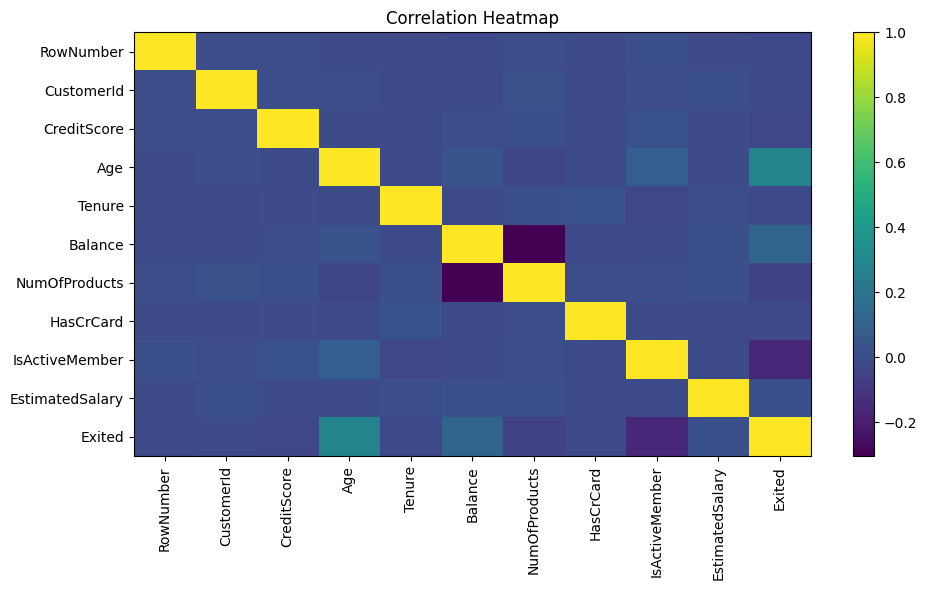

In [19]:
#6. Heatmap 
plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

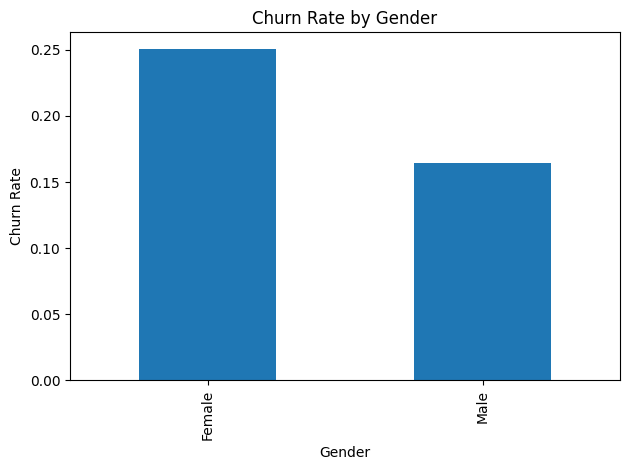

In [20]:
#7. Bar Chart: Churn by Gender 
if "Gender" in df_clean.columns:
    df_clean.groupby("Gender")[churn_col].mean().plot(kind="bar")
    plt.title("Churn Rate by Gender")
    plt.ylabel("Churn Rate")
    plt.xlabel("Gender")
    plt.tight_layout()
    plt.show()

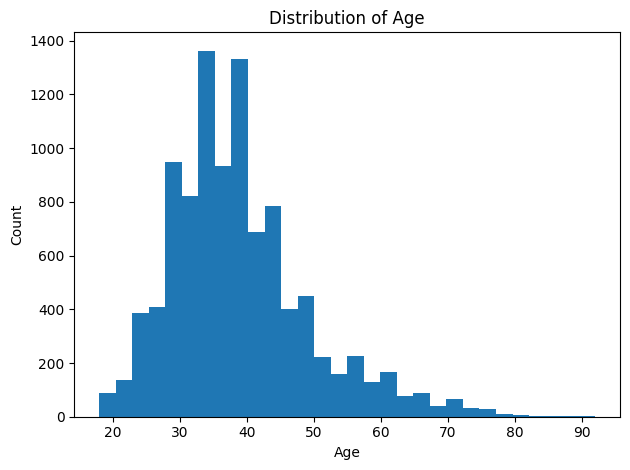

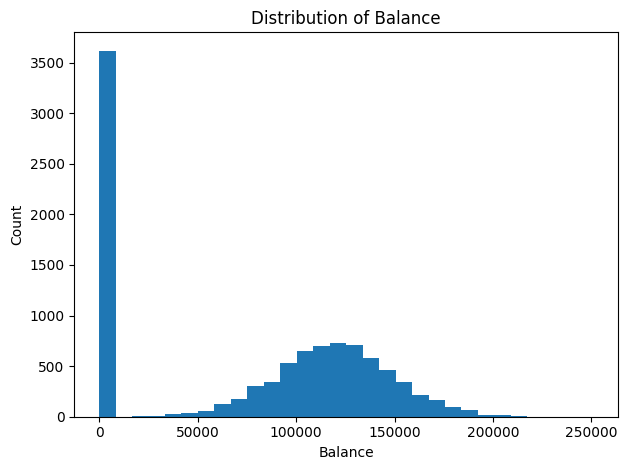

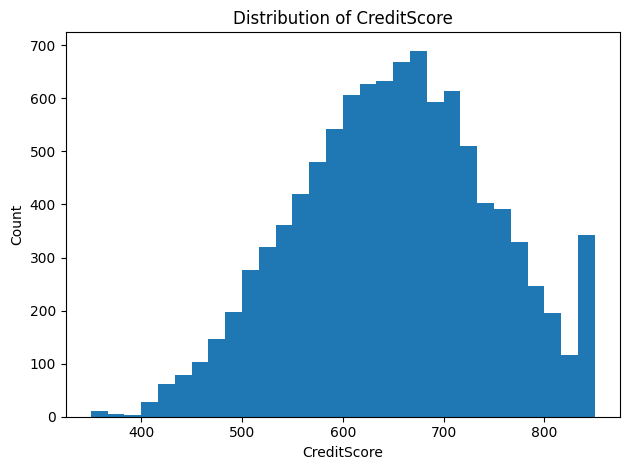

In [21]:
#8. Distribution Plots 
for col in ["Age", "Balance", "CreditScore"]:
    if col in df_clean.columns:
        plt.hist(df_clean[col], bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

In [24]:
#9. Save Cleaned Data 
output_path = r"D:\churn analysis\churn.csv"
df_clean.to_csv(output_path, index=False)

print("\nCleaned file saved at:", output_path)


Cleaned file saved at: D:\churn analysis\churn.csv
